In [10]:
# -*- coding: utf-8 -*-
"""
Created on Wed Aug 11 13:15:41 2021

Plot figures from the data downloaded from wandB

@author: Paul Zheng
"""

import numpy as np
import pandas as pd
from numpy import loadtxt
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from scipy.signal import savgol_filter
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Computer Modern Serif"]})
font_size = 24
marker_size = 6

args = {'opt': "Prox", #"Avg" "Prox"
        'iid': "diri", #"dirichlet" "niid"
        'dataset': 'cifar', #cifar, mnist, synthetic
        'method': "opti", #"BL" "UR", "opti", "WR", "Sal_WR"
        'ep':20,
        'seed_ind': 0,
        'K':30,
        'R':1000
        }



In [2]:
def give_filename(args):
    saveFileName = f"csv_res/{args['dataset']}_{args['iid']}_K_{args['K']}.csv"
    return saveFileName

def give_data(args):
    file_name = give_filename(args)
    iid_flag = 'd' if args['iid']=="diri" else 'n'
    method_flag = 'Op' if args['method']=="opti" else "WR"
    lala = pd.read_csv(file_name)
    yoyo = pd.read_csv(f"csv_res/{args['dataset']}_{args['iid']}_all_seed3_R{args['R']}.csv")
    # print(lala.columns)
    # key_names = [f"{iid_flag}{method_flag}_lUE_{args['K']}_cellR_{args['R']} - accuracy"]
    key_names = [f"{iid_flag}{method_flag}_lUE_{args['K']}_cellR_{args['R']}_s_{1} - accuracy"]
    # key_names.append(f"{iid_flag}{method_flag}_lUE_{args['K']}_cellR_{args['R']}_s_{1} - accuracy")
    key_names.append(f"{iid_flag}{method_flag}_lUE_{args['K']}_cellR_{args['R']}_s_{2} - accuracy")
    key_name_yoyo = [f"{iid_flag}{method_flag}_lUE_{args['K']}_cellR_{args['R']} - accuracy"]
    return lala[key_names].mean(axis=1)
    if key_name_yoyo[0] in yoyo.columns:
        return pd.concat([lala[key_names], yoyo[key_name_yoyo]],axis=1).mean(axis=1)
    
    else:
        key_names.append(key_name_yoyo[0])
        return lala[key_names].mean(axis=1)
    # return lala[key_names].mean(axis=1)
    # return pd.concat([lala[key_names], yoyo[key_name_yoyo]])

lala =give_data(args)
# plt.plot(lala.rolling(11).mean())
lala


0      10.345000
1       9.110000
2       9.960000
3      10.000000
4      10.670000
         ...    
595    52.665001
596    53.050001
597    52.570000
598    52.049999
599    51.920000
Length: 600, dtype: float64

In [3]:
def detect_iter_accuracy(acc, thr, window_size):
    acc_pd= pd.Series(acc)
    acc_smooth = acc_pd.rolling(window_size).mean()
    acc_std = acc_pd.rolling(window_size).std()
    bool_wanted = (acc_smooth - acc_std > thr)
    ind_wanted = np.where(bool_wanted)[0]
    # print(ind_wanted)
    if len(ind_wanted) == 0:
        return 1000
    return ind_wanted[0]

def give_full_method_name(abb):
    if abb == "optil":
        return "our method loss"
    if abb == "opti":
        return "our method"
    if abb == "optils":
        return "our method loss and size"
    if abb == "BL":
        return "best loss"
    if abb == "uni":
        return "uniform"
    if abb == "WR":
        return "weighted random"
    if abb == "BC":
        return "best channel"
    if abb == "Salehi":
        return "Salehi"


# Plot several cell sizes

600
567
600
314
600
258
600
261
600
324
600
393
600
589
600
345
600
261
600
257
600
324
600
378
600
accuracy not attained for K=1 and opti
600
349
600
271
600
306
600
327
600
476
600
accuracy not attained for K=1 and WR
600
411
600
304
600
285
600
414
600
587
600
accuracy not attained for K=1 and opti
600
425
600
290
600
312
600
328
600
326
600
accuracy not attained for K=1 and WR
600
446
600
304
600
328
600
554
600
accuracy not attained for K=30 and WR


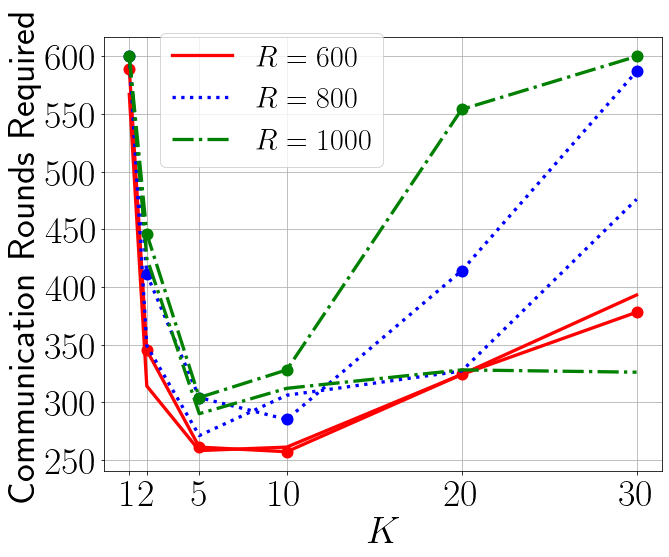

45_cifar_diri
opti
    R=600  R=800  R=1000
1   567.0  600.0   600.0
2   314.0  349.0   425.0
5   258.0  271.0   290.0
10  261.0  306.0   312.0
20  324.0  327.0   328.0
30  393.0  476.0   326.0
WR
    R=600  R=800  R=1000
1   589.0  600.0   600.0
2   345.0  411.0   446.0
5   261.0  304.0   304.0
10  257.0  285.0   328.0
20  324.0  414.0   554.0
30  378.0  587.0   600.0
diff
    R=600  R=800  R=1000
1    22.0    0.0     0.0
2    31.0   62.0    21.0
5     3.0   33.0    14.0
10   -4.0  -21.0    16.0
20    0.0   87.0   226.0
30  -15.0  111.0   274.0
[[   22. -1000. -1000.]
 [   31.    62.    21.]
 [    3.    33.    14.]
 [   -4.   -21.    16.]
 [    0.    87.   226.]
 [  -15.   111.   274.]]


In [22]:
import numpy as np
import pandas as pd
from numpy import loadtxt
import matplotlib
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Computer Modern Serif"]})
font_size = 38
marker_size = 10
accuracy_attained = 45

args = {'opt': "Prox", #"Avg" "Prox"
        'iid': "diri", #"dirichlet" "niid"
        'dataset': 'cifar', #cifar, mnist, synthetic
        'method': "opti", #"BL" "UR", "opti", "WR", "Sal_WR"
        'ep':20,
        'seed_ind': 0,
        'K':10,
        'R':1000
        }
nb_rounds = 600 if args['iid']=='diri' else 1000 # 600 for diri cifar10, 1000 default
def detect_iter_accuracy(acc, thr, window_size, nb_rounds):
    # acc_pd= pd.Series(acc)
    acc_pd= acc
    acc_smooth = acc_pd.rolling(window_size).mean()
    acc_std = acc_pd.rolling(window_size).std()
    # bool_wanted = (acc_smooth - acc_std > thr)
    bool_wanted = (acc_smooth - acc_std/3> thr)
    # bool_wanted = (acc_smooth > thr)
    ind_wanted = np.where(bool_wanted)[0]
    
    if len(ind_wanted) == 0:
        return nb_rounds
    else:
        print(ind_wanted[0])
    return ind_wanted[0]
    

fig = plt.figure(figsize=[10,8])
ax = fig.add_subplot(111)
# fig, ax = plt.subplots(figsize=[15,12])
colors = ['r', 'b', 'g', 'c','m','y']
# markers = ['o', '<','x','2','+','D']
markers = ['', 'o']
line_style = ['-', ':', '-.']
id_color = 0
# font_size = 34
if args['iid'] == 'diri':
    window_size = 11 # 51, 81
    nb_ite_div100= 5
    loweracc=6
else:
    window_size = 41
    # window_size = 21
    nb_ite_div100= 8
    loweracc=2
Kvec = [1,2,5,10,20,30]
# Kvec = [30]
res_all_opti = np.zeros((len(Kvec),3))
res_all_WR = np.zeros((len(Kvec),3))
# res_K = np.zeros((len(Kvec),2))
# for idm, meth in enumerate(["Salehi"]):
for id_R, cell_radius in enumerate([600,800,1000]):
    args['R']  = cell_radius
    for idm, meth in enumerate(["opti","WR"]):#
        args['method'] = meth
        res_K = np.ones(len(Kvec))*1000
        for idK, K in enumerate(Kvec):
            args['K'] = K
            try:
                acc = give_data(args)
            except:
                print('data not available for K={}, {}, R= {}'.format(K, meth, cell_radius))
                continue
            print(len(acc))
            lala = detect_iter_accuracy(acc, accuracy_attained, window_size, nb_rounds)
            if lala is None or lala ==nb_rounds:
                print('accuracy not attained for K={} and {}'.format(K, meth))
                res_K[idK] = nb_rounds
                # print(nb_rounds)
                continue
            res_K[idK] = lala
            # comm_rounds = np.arange(1,len(acc)+1)
            # acc_pd= pd.Series(acc)
            # acc_smooth = acc_pd.rolling(window_size).mean()
            # acc_std = acc_pd.rolling(window_size).std()
            # # acc_smooth = savgol_filter(vec_avg_dict[key], 21, 3)
            # plt.plot(comm_rounds,np.asarray(acc_smooth), linewidth = 4.0,
            #          marker = markers[id_color],markevery=20, markersize = 12,
            #          label=give_full_label_name(K,meth), color = colors[id_color])
            # indvec = np.arange(5*id_color,len(acc), step=160)
            # ax.errorbar(np.arange(1,len(acc_pd)+1)[indvec],
            #             np.asarray(acc_smooth)[indvec], 
            #             yerr = np.asarray(acc_std)[indvec],
            #             color = colors[id_color],
            #             fmt='o', capsize=8,linewidth = 4)
        if idm == 0:
            res_all_opti[:, id_R] = res_K
        else:
            res_all_WR[:, id_R] = res_K
        plt.plot(Kvec, res_K, linewidth = 3.3, markersize = marker_size, linestyle = line_style[id_R],markeredgewidth = 2,
                 marker = markers[idm], color = colors[id_R],label =  f"{give_full_method_name(meth)},$R={cell_radius}$")
    
# plt.plot(Kvec, res_K[:,0], label= "our method", linewidth = 4.0, markersize = 14, marker = 'o')
# plt.plot(Kvec, res_K[:,1], label= "uniform", linewidth = 4.0, markersize = 24, marker = '+')
plt.xlabel("$K$",fontsize=font_size)
plt.ylabel("Communication Rounds Required",fontsize=font_size)
# plt.legend(loc=0,prop={'size': font_size-5}, bbox_to_anchor=(0.65,0.64))
legend_elements = [Line2D([0], [0], color=colors[0], linestyle = line_style[0], lw=3.3, label='$R=600$'),
                   Line2D([0], [0], color=colors[1], linestyle = line_style[1], lw=3.3, label='$R=800$'),
                   Line2D([0], [0], color=colors[2], linestyle = line_style[2],lw=3.3, label='$R=1000$')]
plt.legend(handles=legend_elements, prop={'size': font_size-8}, loc =(0.1,0.70))
# plt.legend(loc=0,prop={'size': font_size-7})
# plt.legend(loc=(0.2,0.65),prop={'size': font_size-5})
plt.grid()
plt.xticks(Kvec, fontsize= font_size)
plt.yticks(fontsize= font_size)
# plt.xticks(np.arange(nb_ite_div100+1)*100, fontsize = font_size)
# plt.yticks(np.arange(loweracc,10)*10, fontsize = font_size)
# plt.title("Fed"+args['opt'] + " "+args['iid']+" alpha = 0.5", fontsize =font_size)
# plt.title(args['iid'], fontsize =font_size)

# ax.tick_params(color='#dddddd')
# ax.spines['bottom'].set_color('#dddddd')
# ax.spines['top'].set_color('#dddddd') 
# ax.spines['right'].set_color('#dddddd')
# ax.spines['left'].set_color('#dddddd')
# plt.tight_layout()
# figure_folder = "D:/Documents/Sciebo_groupfiles/PhD_Paul/figures/"
# figure_folder = "D:/sciebo/files/PhD_Paul/figures/"
# plt.savefig(figure_folder+"comp_K_"+args['iid']+".pdf")
plt.savefig(f"./figures2/comp_K_acc_{accuracy_attained}_{args['dataset']}_{args['iid']}3.pdf", bbox_inches="tight")
plt.show()



import pandas as pd
import csv 
df_opti = pd.DataFrame(res_all_opti, columns = ['R=600', 'R=800','R=1000'], index = Kvec)
df_WR = pd.DataFrame(res_all_WR, columns = ['R=600', 'R=800','R=1000'], index = Kvec)
print(f"{accuracy_attained}_{args['dataset']}_{args['iid']}")
print("opti")
print(df_opti)
print("WR")
print(df_WR)
print("diff")
print(df_WR - df_opti)

res_all = np.zeros((len(Kvec),3,3))
res_all[:,:,0] = res_all_opti
res_all[:,:,1] = res_all_WR
res_all[:,:,2] = res_all_WR - res_all_opti
res_all[:,:,2][(res_all[:,:,0] == nb_rounds) * (res_all[:,:,1] == nb_rounds)] = -1000
print(res_all[:,:,2])

with open(f"./python_res/comp_K_acc_{accuracy_attained}_{args['dataset']}_{args['iid']}3.npy", 'wb') as f:
    np.save(f, res_all)
with open(f"./python_res/comp_K_acc_{accuracy_attained}_{args['dataset']}_{args['iid']}3.csv", 'w') as f:
    # create the csv writer
    writer = csv.writer(f)

    # write a row to the csv file
    for row in res_all[:,:,2]:
        writer.writerow(row)

In [5]:
import pandas as pd
import csv 
df_opti = pd.DataFrame(res_all_opti, columns = ['R=600', 'R=800','R=1000'], index = Kvec)
df_WR = pd.DataFrame(res_all_WR, columns = ['R=600', 'R=800','R=1000'], index = Kvec)
print(f"{accuracy_attained}_{args['dataset']}_{args['iid']}")
print("opti")
print(df_opti)
print("WR")
print(df_WR)
print("diff")
print(df_WR - df_opti)

res_all = np.zeros((len(Kvec),3,3))
res_all[:,:,0] = res_all_opti
res_all[:,:,1] = res_all_WR
res_all[:,:,2] = res_all_WR - res_all_opti

with open(f"./python_res/comp_K_acc_{accuracy_attained}_{args['dataset']}_{args['iid']}.npy", 'wb') as f:
    np.save(f, res_all)
with open(f"./python_res/comp_K_acc_{accuracy_attained}_{args['dataset']}_{args['iid']}.csv", 'w') as f:
    # create the csv writer
    writer = csv.writer(f)

    # write a row to the csv file
    for row in res_all[:,:,2]:
        writer.writerow(row)

45_cifar_diri
opti
    R=600  R=800  R=1000
1   567.0  600.0   600.0
2   314.0  349.0   425.0
5   258.0  271.0   290.0
10  261.0  306.0   312.0
20  324.0  327.0   328.0
30  393.0  476.0   326.0
WR
    R=600  R=800  R=1000
1   589.0  600.0   600.0
2   345.0  411.0   446.0
5   261.0  304.0   304.0
10  257.0  285.0   328.0
20  324.0  414.0   554.0
30  378.0  587.0   600.0
diff
    R=600  R=800  R=1000
1    22.0    0.0     0.0
2    31.0   62.0    21.0
5     3.0   33.0    14.0
10   -4.0  -21.0    16.0
20    0.0   87.0   226.0
30  -15.0  111.0   274.0


In [6]:
import pandas as pd
import csv
df_opti = pd.DataFrame(res_all_opti, columns = ['R=600', 'R=800','R=1000'], index = Kvec)
df_WR = pd.DataFrame(res_all_WR, columns = ['R=600', 'R=800','R=1000'], index = Kvec)
print(f"{accuracy_attained}_{args['dataset']}_{args['iid']}")
print("opti")
print(df_opti)
print("WR")
print(df_WR)
print("diff")
print(df_WR - df_opti)

res_all = np.zeros((len(Kvec),3,3))
res_all[:,:,0] = res_all_opti
res_all[:,:,1] = res_all_WR
res_all[:,:,2] = res_all_WR - res_all_opti



with open(f"./python_res/comp_K_acc_{accuracy_attained}_{args['dataset']}_{args['iid']}.npy", 'wb') as f:
    np.save(f, res_all)
with open(f"./python_res/comp_K_acc_{accuracy_attained}_{args['dataset']}_{args['iid']}.csv", 'w') as f:
    # create the csv writer
    writer = csv.writer(f)

    # write a row to the csv file
    for row in res_all[:,:,2]:
        writer.writerow(row)

45_cifar_diri
opti
    R=600  R=800  R=1000
1   567.0  600.0   600.0
2   314.0  349.0   425.0
5   258.0  271.0   290.0
10  261.0  306.0   312.0
20  324.0  327.0   328.0
30  393.0  476.0   326.0
WR
    R=600  R=800  R=1000
1   589.0  600.0   600.0
2   345.0  411.0   446.0
5   261.0  304.0   304.0
10  257.0  285.0   328.0
20  324.0  414.0   554.0
30  378.0  587.0   600.0
diff
    R=600  R=800  R=1000
1    22.0    0.0     0.0
2    31.0   62.0    21.0
5     3.0   33.0    14.0
10   -4.0  -21.0    16.0
20    0.0   87.0   226.0
30  -15.0  111.0   274.0


In [7]:
args = {'opt': "Prox", #"Avg" "Prox"
        'iid': "niid", #"dirichlet" "niid"
        'dataset': 'cifar', #cifar, mnist, synthetic
        'method': "opti", #"BL" "UR", "opti", "WR", "Sal_WR"
        'ep':20,
        'seed_ind': 0,
        'K':10,
        'R':1000
        }
import csv
RVn = [600,800,1000]
accuracy_attained = 30
res_fname = f"./python_res/comp_K_acc_{accuracy_attained}_{args['dataset']}_{args['iid']}2.csv"
# res_fname = f"./python_res/comp_K_acc_{accuracy_attained}_{args['dataset']}_{args['iid']}.csv"
print("file name: ", res_fname)
res_all = []
with open(res_fname, newline='') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=' ')
    for row in spamreader:
        print(row[0].split(','))
        res_all.append(row[0].split(','))
res_lala = [[int(float(lala)) for lala in row] for row in res_all]
res_lala = np.array(res_lala)

for i in range(3):
    print("R =",RVn[i])
    yoyo = res_lala[:,i]
    yoyo = yoyo.astype("str")
    yoyo[yoyo=='-1000'] = 'X'
    print(" & ".join(yoyo))
    

file name:  ./python_res/comp_K_acc_30_cifar_niid2.csv
['-1000.0', '-1000.0', '-1000.0']
['-1000.0', '-1000.0', '-1000.0']
['-224.0', '190.0', '63.0']
['105.0', '-19.0', '-107.0']
['4.0', '-3.0', '-1000.0']
['-53.0', '-1000.0', '17.0']
R = 600
X & X & -224 & 105 & 4 & -53
R = 800
X & X & 190 & -19 & -3 & X
R = 1000
X & X & 63 & -107 & X & 17
